In [1]:
import tensorflow 

In [2]:
from tensorflow.keras.datasets import cifar10
data  = cifar10.load_data()
(x_train, y_train), (x_test, y_test) = data

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
x_test[4]

array([[[ 65,  68,  50],
        [ 70,  81,  64],
        [ 48,  64,  46],
        ...,
        [ 51,  67,  41],
        [ 54,  76,  53],
        [ 67,  87,  66]],

       [[ 69,  80,  58],
        [ 79, 102,  81],
        [ 60,  74,  57],
        ...,
        [ 54,  66,  44],
        [ 65,  90,  69],
        [ 61,  81,  66]],

       [[ 73,  95,  72],
        [ 84, 109,  87],
        [ 72,  88,  70],
        ...,
        [ 78,  98,  75],
        [ 73,  98,  77],
        [ 48,  59,  51]],

       ...,

       [[ 95, 127,  92],
        [ 91, 123,  86],
        [ 57,  79,  45],
        ...,
        [144, 172, 108],
        [170, 201, 134],
        [122, 143,  98]],

       [[ 94, 125,  82],
        [ 75, 104,  71],
        [ 32,  52,  24],
        ...,
        [143, 181, 116],
        [154, 188, 123],
        [106, 129,  89]],

       [[ 78, 102,  65],
        [ 35,  51,  27],
        [ 24,  40,  17],
        ...,
        [143, 179, 136],
        [154, 185, 146],
        [128, 156, 117]]

In [5]:
class_name = ['airplane', 'automobile', 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']

def get_name(n):
    return class_name[int(n)]

ship


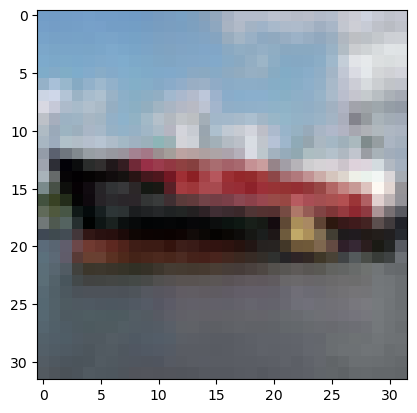

In [6]:
import matplotlib.pyplot as plt 
N=2220
plt.imshow(x_train[N])
print(get_name(y_train[N]))

In [7]:
x_train = x_train/255
x_test  = x_test/255

In [8]:
x_test.shape

(10000, 32, 32, 3)

In [9]:
from tensorflow.keras.models import Sequential 

model = Sequential()

In [10]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout


model.add(Conv2D(input_shape=(32, 32, 3), filters=32, kernel_size=3, padding='same', activation='relu', strides=(1,1)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', strides=(1,1)))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', strides=(1,1), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', strides=(1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))

model.add(Dropout(0.3))

model.add(Flatten())

In [11]:
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history  = model.fit(x_train, y_train, epochs=10, batch_size=50, verbose=1, validation_data=(x_test, y_test),callbacks=(callbacks) )

Epoch 1/10


2024-01-08 09:30:09.062345: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1000/1000 [==============================] - 132s 130ms/step - loss: 1.5583 - sparse_categorical_accuracy: 0.4280 - val_loss: 1.2094 - val_sparse_categorical_accuracy: 0.5677
Epoch 2/10
1000/1000 [==============================] - 95s 95ms/step - loss: 1.0698 - sparse_categorical_accuracy: 0.6202 - val_loss: 0.9365 - val_sparse_categorical_accuracy: 0.6632
Epoch 3/10
1000/1000 [==============================] - 101s 101ms/step - loss: 0.8743 - sparse_categorical_accuracy: 0.6894 - val_loss: 0.8396 - val_sparse_categorical_accuracy: 0.7012
Epoch 4/10
1000/1000 [==============================] - 103s 103ms/step - loss: 0.7677 - sparse_categorical_accuracy: 0.7287 - val_loss: 0.7944 - val_sparse_categorical_accuracy: 0.7226
Epoch 5/10
1000/1000 [==============================] - 99s 99ms/step - loss: 0.6801 - sparse_categorical_accuracy: 0.7600 - val_loss: 0.7628 - val_sparse_categorical_accuracy: 0.7353
Epoch 6/10
1000/1000 [==============================] - 101s 101ms/step - loss: 0.613

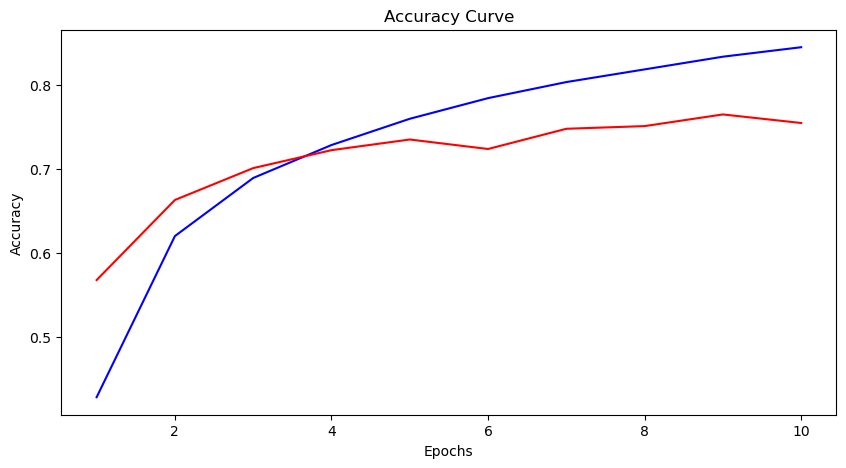

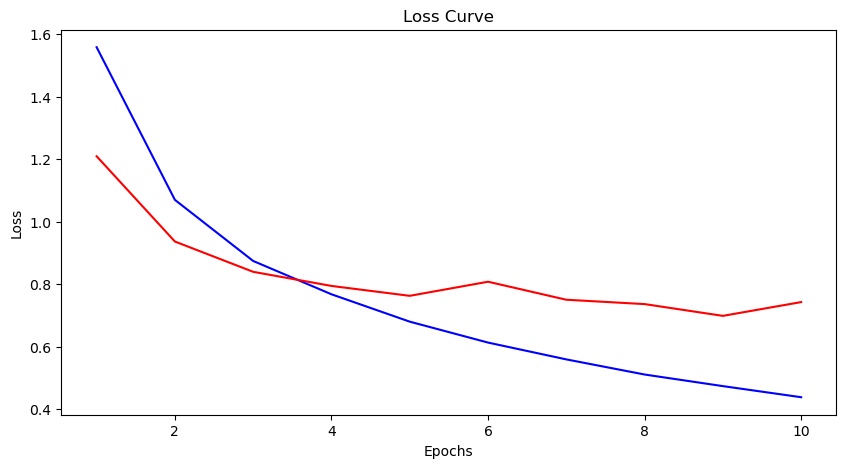

In [15]:
train_accuracy = history.history['sparse_categorical_accuracy']
test_accuracy = history.history['val_sparse_categorical_accuracy']

train_loss = history.history['loss']
test_loss = history.history['val_loss']

epoch = range(1, len(train_accuracy)+1)

plt.figure(figsize=(10,5))
plt.plot(epoch, train_accuracy, 'b', label='Train Accuracy')
plt.plot(epoch, test_accuracy, 'r', label='Test Accuracy')
plt.title("Accuracy Curve")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(epoch, train_loss, 'b', label='Training Loss')
plt.plot(epoch, test_loss, 'r', label='Test Loss')
plt.title("Loss Curve")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [16]:
prediction  = model.predict(x_test)
prediction.shape

313/313 [==============================] - 7s 20ms/step


(10000, 10)

In [17]:
import numpy as np
predicted_val = np.argmax(prediction, axis=1)

In [18]:
predicted_val.shape

(10000,)

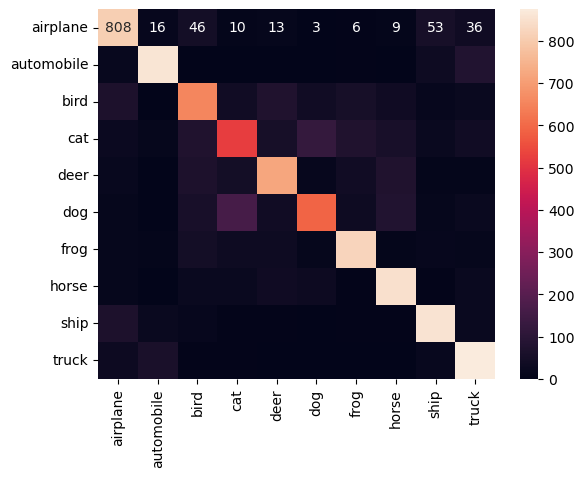

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_val)

import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_name, yticklabels=class_name)
plt.show()

y_test: dog
y_pred: cat


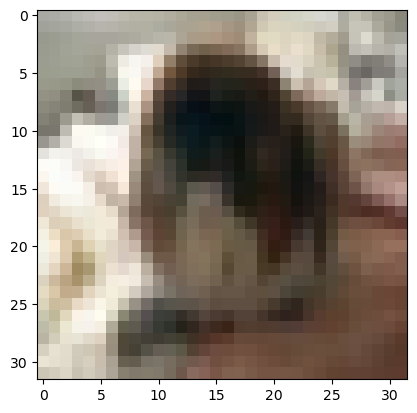

In [21]:
N=200
plt.imshow(x_test[N])
print("y_test: {}".format(get_name(y_test[N])))
print("y_pred: {}".format(get_name(predicted_val[N])))

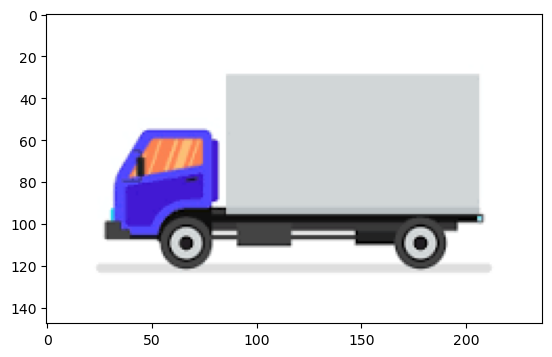

In [23]:
import cv2

image = cv2.imread('truck.png') 
plt.imshow(image)

In [24]:
image.shape

(148, 237, 3)

In [25]:
img = cv2.resize(image, (32, 32))

In [26]:
img.shape

(32, 32, 3)

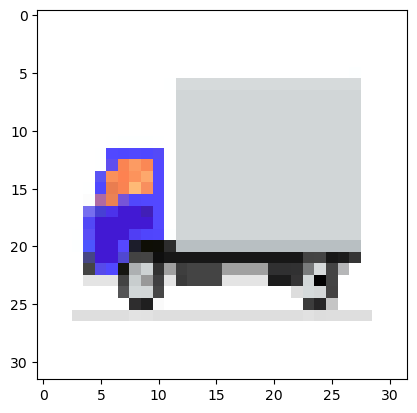

In [27]:
plt.imshow(img)

In [28]:
img = img.reshape(1, 32, 32, 3)
prediction_new = model.predict(img)
prediction_new_val = np.argmax(prediction_new, axis=1)
print(get_name(prediction_new_val))

1/1 [==============================] - 0s 78ms/step
truck
